In [321]:
!pip install pandas-profiling

In [322]:
!pip install Unidecode

In [323]:
#Here I have removed all greek characters, @,numbers.
#Also I have removed 'hmm' word and it's variants
#Creating a dictionary to map words such as luv to love, wud to would.Need more suggestions on this.nyc:nice
#Removed stop words
#Performed lemmatization

In [324]:
!pip install wordcloud

In [325]:
!pip install plotly
!pip install sklearn

In [326]:
import pandas_profiling
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sb
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter
%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\romin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\romin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [327]:
df = pd.read_csv('C:/Users/romin/Desktop/Project/new model/train_E6oV3lV.csv')

# New Section

In [328]:
df.head()

,id,label,tweet
0,1,1,you are whore fuck you asshole nigga
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [329]:
pandas_profiling.ProfileReport(df)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]


In [330]:
df.head()

,id,label,tweet
0,1,1,you are whore fuck you asshole nigga
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [331]:
df.shape

(31963, 3)

In [332]:
df.drop_duplicates(inplace = True)

In [333]:
df.shape

(31963, 3)

In [334]:
df['tweet'].isna().sum()

0

In [335]:
df['label'].isna().sum()

0

In [336]:
#Data doesn't contain duplicate values neither does it contain missing values

In [337]:
df.shape

(31963, 3)

In [338]:
#Code to remove @
df['clean_tweet'] = df['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))

In [339]:
df.head()

,id,label,tweet,clean_tweet
0,1,1,you are whore fuck you asshole nigga,you are whore fuck you asshole nigga
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [340]:
#Removing numbers
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split() if not tweet == '\d*']))

In [341]:
df.head()

,id,label,tweet,clean_tweet
0,1,1,you are whore fuck you asshole nigga,you are whore fuck you asshole nigga
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [342]:
# !pip install unidecode

In [343]:
#Removing all the greek characters using unidecode library
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()])) 

In [344]:
df.head(10)

,id,label,tweet,clean_tweet
0,1,1,you are whore fuck you asshole nigga,you are whore fuck you asshole nigga
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannya|
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.d- ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [345]:
#To check the disappearance of greek symbols
df['clean_tweet'][7]

"the next school year is the year for exams.d- can't think about that d #school #exams #hate #imagine #actorslife #revolutionschool #girl"

In [346]:
#Removing the word 'hmm' and it's variants
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word == 'h(m)+' ]))

In [347]:
df.head()

,id,label,tweet,clean_tweet
0,1,1,you are whore fuck you asshole nigga,you are whore fuck you asshole nigga
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [348]:
#Code for removing slang words
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food'} ## Need a huge dictionary
words = "I luv myself"
words = words.split()
reformed = [d[word] if word in d else word for word in words]
reformed = " ".join(reformed)

In [349]:
reformed

'I love myself'

In [350]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))

In [351]:
df.head(20)

,id,label,tweet,clean_tweet
0,1,1,you are whore fuck you asshole nigga,you are whore fuck you asshole nigga
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannya|
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.d- ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [352]:
#Finding words with # attached to it
df['#'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))

In [353]:
df.head()

,id,label,tweet,clean_tweet,#
0,1,1,you are whore fuck you asshole nigga,you are whore fuck you asshole nigga,
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation


In [354]:
frame = df['#']

In [355]:
frame.head()

0                                  
1    #lyft #disapointed #getthanked
2                                  
3                            #model
4                       #motivation
Name: #, dtype: object

In [356]:
type(frame)

pandas.core.series.Series

In [357]:
frame = pd.DataFrame(frame)

In [358]:
frame = frame.rename({'#':'Count(#)'},axis = 'columns')

In [359]:
frame.head()

,Count(#)
0,
1,#lyft #disapointed #getthanked
2,
3,#model
4,#motivation


In [360]:
frame[frame['Count(#)'] == ''] = 'No hashtags'

In [361]:
frame.head()

,Count(#)
0,No hashtags
1,#lyft #disapointed #getthanked
2,No hashtags
3,#model
4,#motivation


In [362]:
df.head()

,id,label,tweet,clean_tweet,#
0,1,1,you are whore fuck you asshole nigga,you are whore fuck you asshole nigga,
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation


In [363]:
data_frame = pd.concat([df,frame],axis = 1)

In [364]:
data_frame.head(10)

,id,label,tweet,clean_tweet,#,Count(#)
0,1,1,you are whore fuck you asshole nigga,you are whore fuck you asshole nigga,,No hashtags
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation,#motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...,#allshowandnogo,#allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannya|,,No hashtags
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.d- ...,#school #exams #hate #imagine #actorslife #rev...,#school #exams #hate #imagine #actorslife #rev...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...,#allin #cavs #champions #cleveland #clevelandc...,#allin #cavs #champions #cleveland #clevelandc...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !,#gr8,#gr8


In [365]:
data_frame.drop('#',axis = 1,inplace = True)

In [366]:
data_frame.head(10)

,id,label,tweet,clean_tweet,Count(#)
0,1,1,you are whore fuck you asshole nigga,you are whore fuck you asshole nigga,No hashtags
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...,#allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannya|,No hashtags
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.d- ...,#school #exams #hate #imagine #actorslife #rev...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...,#allin #cavs #champions #cleveland #clevelandc...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !,#gr8


In [367]:
#Column showing whether the corresponding tweet has a hash tagged word or not
data_frame = data_frame.rename({'Count(#)':'Hash words'},axis = 'columns')

In [368]:
data_frame.head()

,id,label,tweet,clean_tweet,Hash words
0,1,1,you are whore fuck you asshole nigga,you are whore fuck you asshole nigga,No hashtags
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation


In [369]:
#Removing stopwords
import nltk
nltk.download('stopwords')
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\romin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [370]:
data_frame.head()

,id,label,tweet,clean_tweet,Hash words
0,1,1,you are whore fuck you asshole nigga,whore fuck asshole nigga,No hashtags
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't use cause offer whee...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday majesty,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model love u take u time urd+-!!! dddd d|d|d|,#model
4,5,0,factsguide: society now #motivation,factsguide: society #motivation,#motivation


In [371]:
#Lemmitization
lemmatizer = WordNetLemmatizer()
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [372]:
#Stemming
ps = PorterStemmer()
adwait = data_frame
#adwait.head()
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

In [373]:
data_frame.head()

,id,label,tweet,clean_tweet,Hash words
0,1,1,you are whore fuck you asshole nigga,whore fuck asshol nigga,No hashtags
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't use caus offer wheelc...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday majesti,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model love u take u time urd+-!!! dddd d|d|d|,#model
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv,#motivation


In [374]:
#Tokenization
corpus = []
for i in range(0,31963):
    tweet = data_frame['clean_tweet'][i]
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [375]:
#Ensuring all the tweets are tokenized into individual words
len(corpus)

31963

In [376]:
corpus

['whore fuck asshol nigga',
 "thank #lyft credit can't use cau offer wheelchair van pdx. #disapoint #getthank",
 'bihday majesti',
 '#model love u take u time urd+-!!! dddd d|d|d|',
 'factsguide: societi #motiv',
 '[2/2] huge fan fare big talk leave. chao pay disput get there. #allshowandnogo',
 'camp tomorrow dannya|',
 "next school year year exams.d- can't think #school #exam #hate #imagin #actorslif #revolutionschool #girl",
 'won!!! love land!!! #allin #cav #champion #cleveland #clevelandcavali a|',
 "welcom ! i'm #gr8 !",
 '#ireland consum price index (mom) climb previou 0.2% 0.5% may #blog #silver #gold #forex',
 'selfish. #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love #',
 'get see daddi today!! #80day #gettingf',
 "#cnn call #michigan middl school 'build wall' chant '' #tcot",
 'comment! #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin',
 'ouch...junior angryd#got7 #junior #yugyoem #omg',
 'thank

In [377]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Normal words


(-0.5, 799.5, 499.5, -0.5)

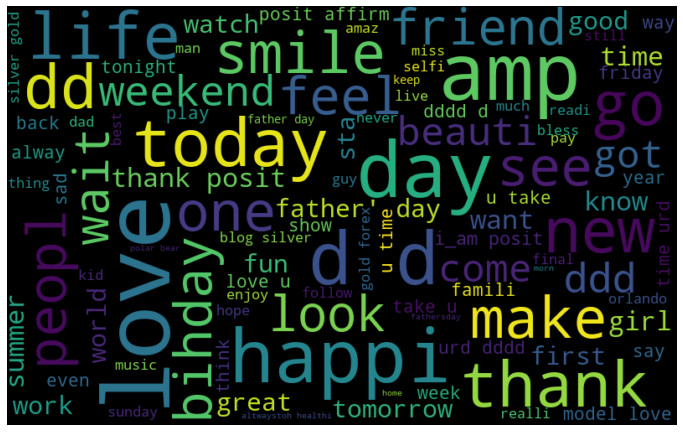

In [378]:
normal_words = ' '.join([word for word in data_frame['clean_tweet'][data_frame['label'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

Normal words


(-0.5, 799.5, 499.5, -0.5)

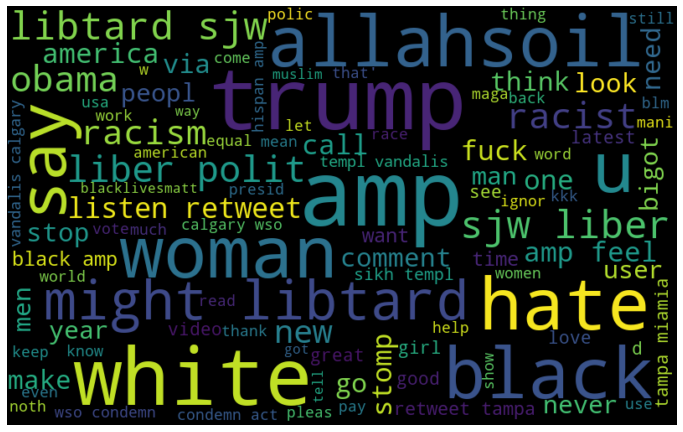

In [379]:
normal_words = ' '.join([word for word in data_frame['clean_tweet'][data_frame['label'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

In [380]:
#Collecting positive hashtags

hash_positive = []
hash_negative = []

In [381]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [382]:
hash_positive = hashtag_extract(data_frame['clean_tweet'][data_frame['label'] == 0])

# extracting hashtags from racist/sexist tweets
hash_negative = hashtag_extract(data_frame['clean_tweet'][data_frame['label'] == 1])

# Converting a multidimensional list to a 1-D list
hash_positive = sum(hash_positive,[])
hash_negative = sum(hash_negative,[])

In [383]:

q = Counter(hash_positive)
q = dict(q.most_common())

In [384]:
l_positive_count = list(q.values())

In [385]:
l_positive_count[0:4]

[1579, 905, 636, 558]

In [386]:
r = Counter(hash_negative)
r = dict(r.most_common())

In [387]:
l_negative_count = list(r.values())

In [388]:
l_negative_count[0:4]

[133, 94, 92, 79]

In [389]:
l_positive_values = list(q.keys())

In [390]:
l_positive_values[0:4]

['love', 'posit', 'smile', 'healthi']

In [391]:
l_negative_values = list(r.keys())

In [392]:
l_negative_values[0:4]

['trump', 'polit', 'allahsoil', 'liber']

In [393]:
#Creating a dataframe to represent top 20 positive and negative hash words
l1 = pd.DataFrame(l_positive_values[0:20],columns = ['Positive_Words'])
l2 = pd.DataFrame(l_positive_count[0:20],columns = ['Positive_Count'])
l3 = pd.DataFrame(l_negative_values[0:20],columns = ['Negative_Words'])
l4 = pd.DataFrame(l_negative_count[0:20],columns = ['Negative_Count'])
z = pd.concat([l1,l2,l3,l4],axis = 1)
z

,Positive_Words,Positive_Count,Negative_Words,Negative_Count
0,love,1579,trump,133
1,posit,905,polit,94
2,smile,636,allahsoil,92
3,healthi,558,liber,79
4,thank,526,libtard,77
5,fun,434,sjw,75
6,affirm,422,retweet,57
7,life,399,black,46
8,model,374,miamia,38
9,summer,361,hate,36


In [394]:
#Animated plot for positive words with their frequency
fig = px.bar(z, x="Positive_Words", y="Positive_Count",animation_frame="Positive_Count",
            hover_name="Positive_Words")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200
fig.show()


In [395]:
# Animated plot for negative words with their frequency
fig = px.bar(z, x="Negative_Words", y="Negative_Count",animation_frame="Negative_Count",
            hover_name="Negative_Words")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200
fig.show()


In [396]:
#Normal histogram of positive words
fig = px.bar(z, x="Positive_Words", y="Positive_Count",
            hover_name="Positive_Words",color = 'Positive_Count')
fig.show()

In [397]:
#Normal histogram of negative words
fig = px.bar(z, x="Negative_Words", y="Negative_Count",
            hover_name="Negative_Words",color= 'Negative_Count')
fig.show()

In [398]:
data_frame.head()

,id,label,tweet,clean_tweet,Hash words
0,1,1,you are whore fuck you asshole nigga,whore fuck asshol nigga,No hashtags
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't use caus offer wheelc...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday majesti,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model love u take u time urd+-!!! dddd d|d|d|,#model
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv,#motivation


In [399]:
#Techniques to convert the tweets into Bag-of-Words, TF-IDF, and Word Embeddings
#Building various classifiers: -
#TF-IDF approach
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2,stop_words='english')
# TF-IDF feature matrix
X1 = tfidf_vectorizer.fit_transform(corpus).toarray()
Y1 = df.loc[:,'label'].values

In [400]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(data_frame['clean_tweet'], data_frame['label'], test_size = 0.1, random_state=0, shuffle = True, stratify=data_frame['label'])
vectorizer = TfidfVectorizer()
X1_train_vect = vectorizer.fit_transform(X1_train)
Y1 = df.loc[:,'label'].values

In [401]:
#Random Forest using pipelines
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline([('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])
rf.fit(X1_train, Y1_train)
y_pred = rf.predict(X1_test)
print(pd.crosstab(Y1_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(Y1_test, y_pred))

Predicted     0    1
Actual              
0          2954   19
1           100  124
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2973
           1       0.87      0.55      0.68       224

    accuracy                           0.96      3197
   macro avg       0.92      0.77      0.83      3197
weighted avg       0.96      0.96      0.96      3197



In [422]:
print(rf.predict(['#peopl protest #trump #republican won-they trump fuher &amp;a|']))
print(rf.predict(['trump ny co-chair make racist remark michel obama #p2 #p21 #fyi #tcot']))
print(rf.predict(['nigga asshole fuck whore']))

[1]
[1]
[1]


In [417]:
for i in X1_train:
    print(i)

#don't feel #someon gave you, #feel sorri #becaus gave #someon who...
rain paused, sun warm &amp; give #shiver
bff jehna broke "boyfriend" kiss/dat
feel know 7 day left school!! #summervac
great way spend friday afternoon team capen park bf !
afraid ?
lozza d1d|ai, #bestfriend #loveh #holiday #tenerif a|
selfi day #massachusett #readi #boston #iloveit #mexican #aupairlif boston,a|
#tech bitcoin coolwallet review ita inde cool wallet
someth #cloud made u today! mondayeveryon #cloudwatch #illinoisa|
talk yourself, like talk somebodi love! #loveyourself #love #lieb #gla 1/4 ck #happi
impress #indigen plant stock university' nursery. #garda|
unreal. #i_am #posit #affirm
#preorder live! #99c/99p swiftli sharpen fang #dystopian tale a|
got new car! excit happy! #newcar #chevrolet #chevycruz #2016 #blue #happi
word live by, never laugh enough! #poland #pnw #wordsofwisdom #laugh #funa|
may allah guid them, name islam.
tomorrow drive ferrari lamborghini test track thank
#allahsoil peopl around 